In [13]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Read CSV File
df = pd.read_csv('new_insurance_data.csv')

In [15]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [17]:
# EDA 
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [18]:
df.isnull().sum().sum()

52

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [20]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [21]:
df.isnull().sum().sum()

0

In [22]:
#Duplicates
df.duplicated().sum()

0

In [23]:
df.drop_duplicates(inplace=True)

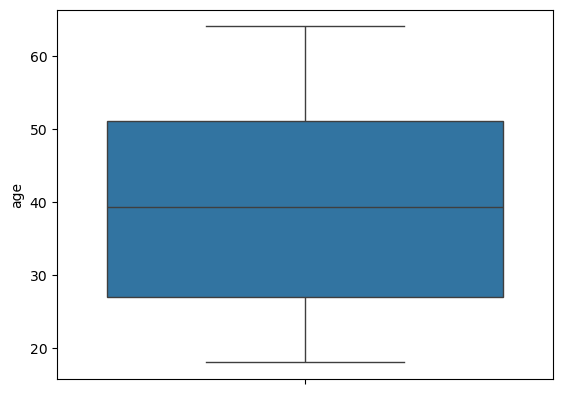

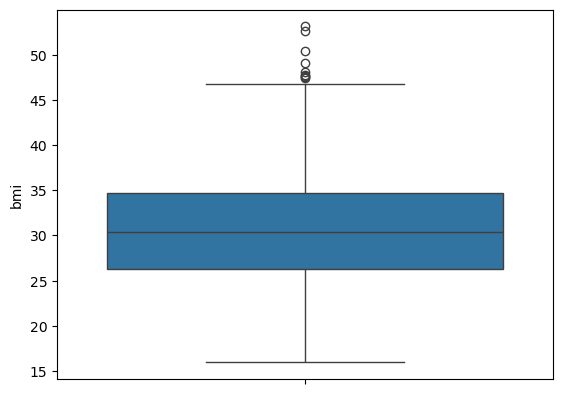

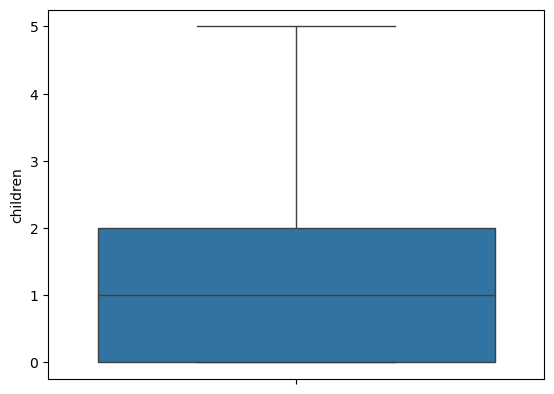

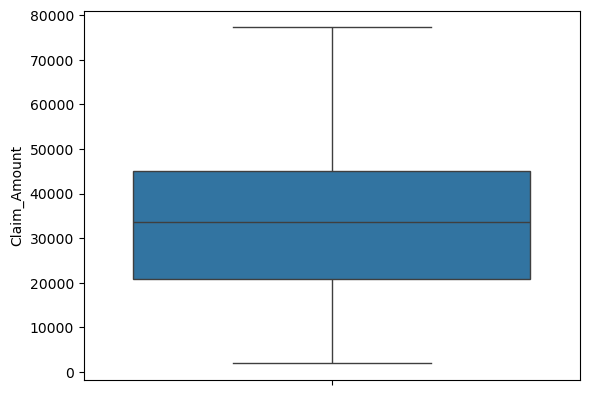

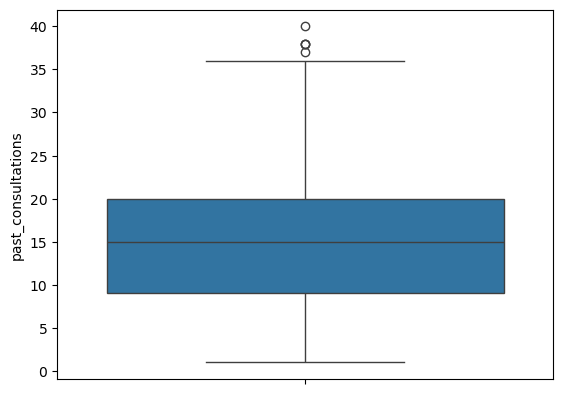

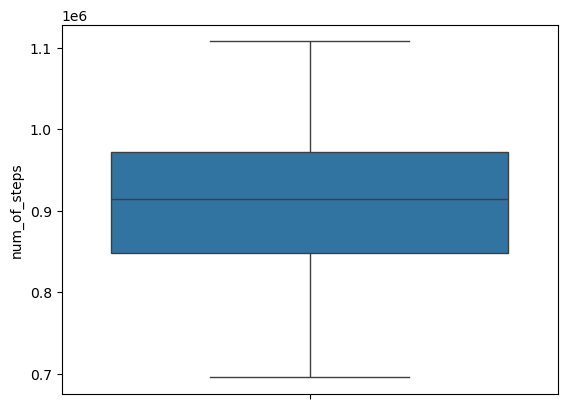

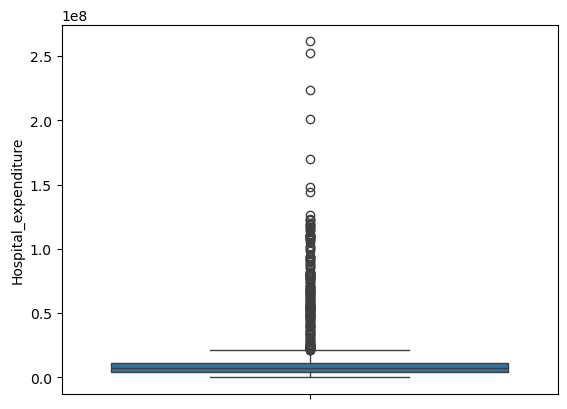

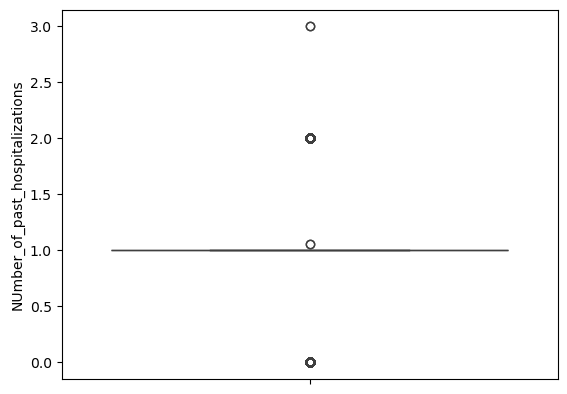

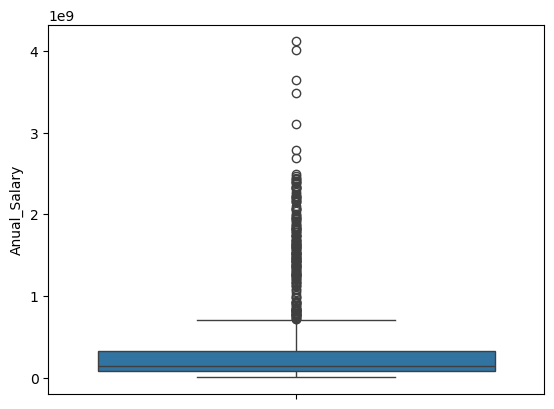

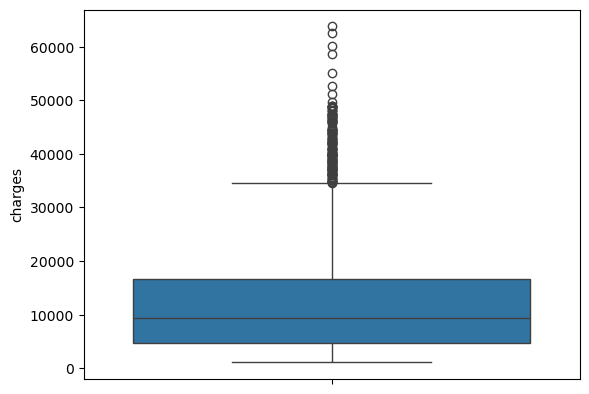

In [24]:
#outliers
for col in df.columns:
    if(df[col].dtype != 'object'):
        sns.boxplot(df[col])
        plt.show()

In [27]:
#Outlier removal
out_list = ['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']

for col in out_list:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    LB = q1 - 1.5*(IQR)
    UB = q3 + 1.5*(IQR)

    df = df[(df[col]>= LB) & (df[col]<= UB)]

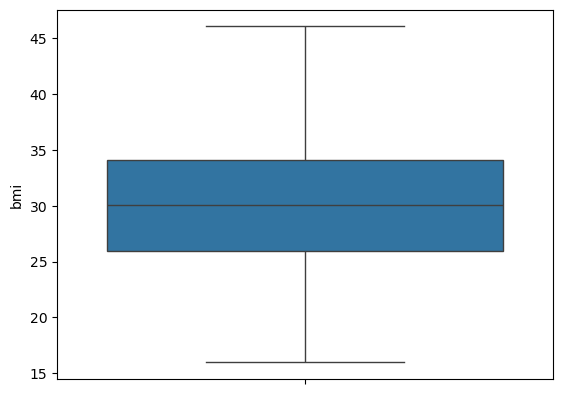

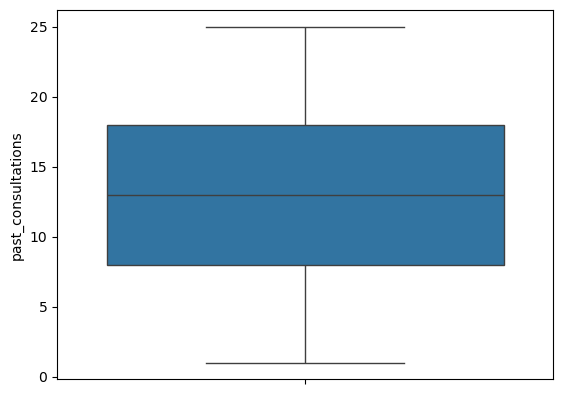

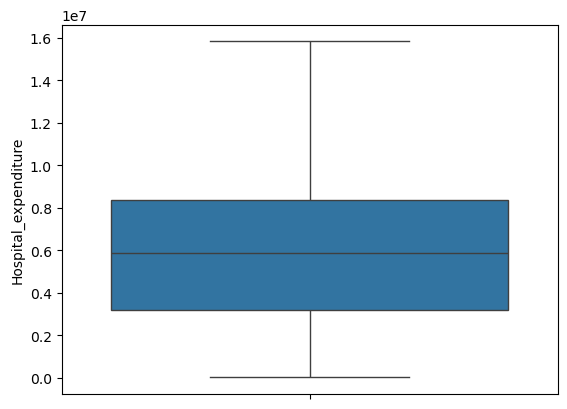

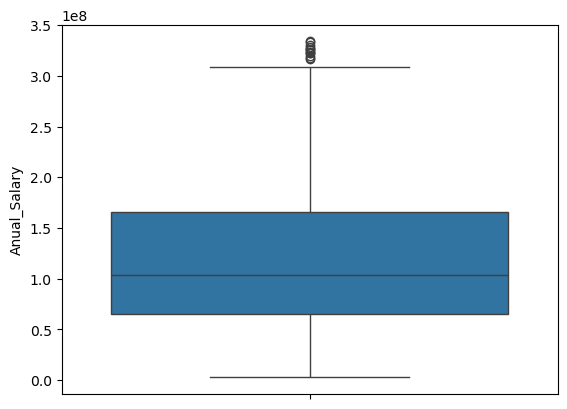

In [28]:
#outliers
for col in out_list:
    if(df[col].dtype != 'object'):
        sns.boxplot(df[col])
        plt.show()

In [29]:
#label encoding -- string - numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if(df[col].dtype == 'object'):
        df[col] = le.fit_transform(df[col])

In [30]:
#Model building
#Spliting the data into x(features), y(target)
x = df.iloc[:,:-1]
y = df['charges']

In [31]:
#Spliting in training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=0)

In [32]:
#Model initialization
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [33]:
#Predicition
y_pred = model.predict(x_test)

In [34]:
#Evaluation
from sklearn.metrics import *
res = r2_score(y_test, y_pred) * 100
res

95.17495980036959

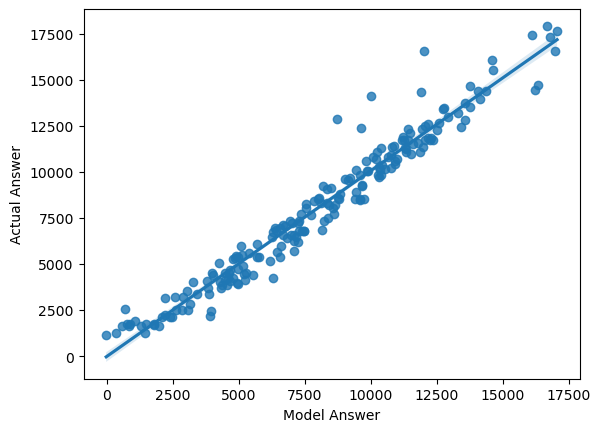

In [36]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Model Answer')
plt.ylabel('Actual Answer')
plt.show()